In [18]:
import os
#os.chdir(r'C:\Users\빅데이터활용센터\Desktop\신천')
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
import pandas as pd
from fiona.crs import from_string
from shapely.geometry import MultiPoint

In [3]:
df = pd.read_csv('merge_right.csv')
df = gpd.GeoDataFrame(df)

df['lon'] = df['lon'].astype(float)
df['lat'] = df['lat'].astype(float)

#4326 좌표계 -> 5181 좌표계
df['geometry'] = df.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
df = gpd.GeoDataFrame(df, geometry='geometry', crs = 'epsg:4326')
df = df.to_crs(epsg=5181)

In [4]:
from pyproj import Proj, transform

final_sum = pd.read_csv('final_sum.csv')
final_mean = pd.read_csv('final_mean.csv')

epsg5179 = Proj(init="epsg:5179")
epsg5181 = Proj(init="epsg:5181")

#5179 좌표계 -> 5181 좌표계             
final_sum['x'], final_sum['y'] = transform(epsg5179, epsg5181, final_sum['X_COORD'].tolist(), final_sum['Y_COORD'].tolist())
final_mean['x'], final_mean['y'] = transform(epsg5179, epsg5181, final_mean['X_COORD'].tolist(), final_mean['Y_COORD'].tolist())

C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\ProgramData\Anaconda3\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-4-8f275427d317>:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  final_sum['x'], final_sum['y'] = transfo

In [5]:
#gpd로 만들기
sumPoint = gpd.GeoDataFrame(final_sum, 
                           geometry = gpd.points_from_xy(final_sum.x, final_sum.y),
                          crs='epsg:5181')

meanPoint = gpd.GeoDataFrame(final_mean, 
                           geometry = gpd.points_from_xy(final_mean.x, final_mean.y),
                          crs='epsg:5181')

In [6]:
L_qun= ['#f0f921', '#f89540', '#cc4778', '#7e03a8','#0d0887']
L_time = [5, 10, 15, 20, 25]

qun_df = pd.DataFrame()

for i in range(5) :
    #특정 색상값을 가진 df만 추출
    qun = L_qun[i]
    df_t = df[df.Qunatity == qun]
    
    #추출된 df의 점들로 폴리곤 생성, 경계값만 가져와서 저장
    poly_t = Polygon(Polygon(MultiPoint([[p.x, p.y] for p in df_t.geometry]).convex_hull).exterior)
    
    #특정 색상값이 나타내는 시간
    time = L_time[i]
    
    #전체 통합
    qun_df = qun_df.append(pd.DataFrame([qun, time, poly_t]).T, ignore_index=True)
    
qun_df.columns = ['qun', 'time', 'geometry']

qun_gdf = gpd.GeoDataFrame(qun_df, geometry='geometry', crs='epsg:5181')
qun_gdf

,qun,time,geometry
0,#f0f921,5,"POLYGON ((344903.627 260878.767, 344758.842 26..."
1,#f89540,10,"POLYGON ((344628.423 260747.433, 344510.023 26..."
2,#cc4778,15,"POLYGON ((344804.757 260546.835, 344402.275 26..."
3,#7e03a8,20,"POLYGON ((344835.830 260244.593, 343993.612 26..."
4,#0d0887,25,"POLYGON ((343869.233 260652.640, 343672.925 26..."


In [ ]:
#spatail join
sumTime = gpd.sjoin(sumPoint, qun_gdf)

#relocate columns
sumTime = sumTime[['geometry', 'qun', 'time', 'month', 
            'H_M_10', 'H_M_20', 'H_M_30', 'H_M_40','H_M_50', 'H_M_60', 'H_M_70', 
            'H_W_10', 'H_W_20', 'H_W_30', 'H_W_40', 'H_W_50', 'H_W_60', 'H_W_70', 
            'W_M_10', 'W_M_20', 'W_M_30', 'W_M_40', 'W_M_50', 'W_M_60', 'W_M_70', 
            'W_W_10', 'W_W_20', 'W_W_30', 'W_W_40', 'W_W_50', 'W_W_60', 'W_W_70', 
            'V_M_10', 'V_M_20', 'V_M_30', 'V_M_40', 'V_M_50', 'V_M_60', 'V_M_70',
            'V_W_10', 'V_W_20', 'V_W_30', 'V_W_40','V_W_50', 'V_W_60', 'V_W_70']].reset_index(drop=True)
       
sumTime

In [ ]:
#spatail join
meanTime = gpd.sjoin(meanPoint, qun_gdf)

#relocate columns
meanTime = meanTime[['geometry', 'qun', 'time', 'month', 
            'H_M_10', 'H_M_20', 'H_M_30', 'H_M_40','H_M_50', 'H_M_60', 'H_M_70', 
            'H_W_10', 'H_W_20', 'H_W_30', 'H_W_40', 'H_W_50', 'H_W_60', 'H_W_70', 
            'W_M_10', 'W_M_20', 'W_M_30', 'W_M_40', 'W_M_50', 'W_M_60', 'W_M_70', 
            'W_W_10', 'W_W_20', 'W_W_30', 'W_W_40', 'W_W_50', 'W_W_60', 'W_W_70', 
            'V_M_10', 'V_M_20', 'V_M_30', 'V_M_40', 'V_M_50', 'V_M_60', 'V_M_70',
            'V_W_10', 'V_W_20', 'V_W_30', 'V_W_40','V_W_50', 'V_W_60', 'V_W_70']].reset_index(drop=True)

meanTime

In [ ]:
#grouping by month
sumTimeGroup = sumTime.groupby(['time','month']).sum().reset_index()
sumTimeGroup.to_csv('C:/Users/빅데이터활용센터/Desktop/신천/timeSumFinal.csv', index=False)

meanTimeGroup = meanTime.groupby(['time','month']).mean().reset_index()
meanTimeGroup.to_csv('C:/Users/빅데이터활용센터/Desktop/신천/timeMeanFinal.csv', index=False)

# 가보자고

In [52]:
df5 = pd.read_csv('./node_csv/node5_4326.csv')
df5 = gpd.GeoDataFrame(df5[['osmid', 'color', 'street_cou', 'lon', 'lat']])

epsg5181 = from_string("+proj=tmerc +lat_0=38 +lon_0=127 +k=1 +x_0=200000 +y_0=500000 +ellps=GRS80 +units=m +no_defs")
epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

df5['lon'] = df5['lon'].astype(float)
df5['lat'] = df5['lat'].astype(float)

#4326 좌표계 -> 5181 좌표계
df5['geometry'] = df5.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
df5 = gpd.GeoDataFrame(df5[['osmid', 'color', 'street_cou', 'geometry']], geometry='geometry', crs = epsg4326)
df5 = df5.to_crs(epsg5181)
df5

,osmid,color,street_cou,geometry
0,288219584,#0d0887,3,POINT (344435.700 266862.435)
1,7966967340,#0d0887,3,POINT (344468.146 266835.327)
2,3114875253,#0d0887,3,POINT (343764.014 267384.475)
3,7966967333,#0d0887,3,POINT (344482.927 266820.217)
4,288219613,#0d0887,3,POINT (344495.659 266807.761)
...,...,...,...,...
1131,8257688116,#0d0887,3,POINT (344683.661 265719.275)
1132,8257688111,#0d0887,3,POINT (344726.866 265550.908)
1133,8257688112,#0d0887,4,POINT (344760.453 265571.372)
1134,9143510593,#0d0887,3,POINT (346792.676 257830.515)


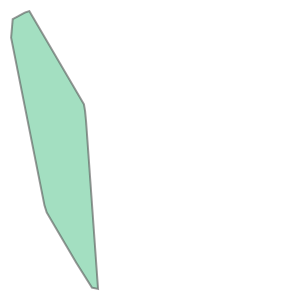

In [41]:
#poly_df = pd.DataFrame()
poly_t = Polygon(Polygon(MultiPoint([[p.x, p.y] for p in df5.geometry]).convex_hull).exterior)
poly_t

In [48]:
L_name=['node5', 'node10', 'node15', 'node20', 'node25']
L_time = [5, 10, 15, 20, 25]

epsg5181 = from_string("+proj=tmerc +lat_0=38 +lon_0=127 +k=1 +x_0=200000 +y_0=500000 +ellps=GRS80 +units=m +no_defs")
epsg4326 = from_string("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs")

final_df = pd.DataFrame()

for i in range(5) :
    
    name=L_name[i]
    df_name = './node_csv/' + name + '_4326.csv'
    df = pd.read_csv(df_name)
    df = gpd.GeoDataFrame(df)

    df['lon'] = df['lon'].astype(float)
    df['lat'] = df['lat'].astype(float)
    
    #4326 좌표계 -> 5181 좌표계
    df['geometry'] = df.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
    df = gpd.GeoDataFrame(df[['osmid', 'color', 'street_cou', 'geometry']], geometry='geometry', crs = epsg4326)
    df = df.to_crs(epsg5181)
    
    #추출된 df의 점들로 폴리곤 생성, 경계값만 가져와서 저장
    poly = Polygon(Polygon(MultiPoint([[p.x, p.y] for p in df.geometry]).convex_hull).exterior)
    
    #특정 색상값이 나타내는 시간
    time = L_time[i]
    
    #전체 통합
    final_df = final_df.append(pd.DataFrame([name, time, poly]).T, ignore_index=True)
    

final_df.columns=['name', 'time', 'geometry']
final_gdf = gpd.GeoDataFrame(final_df, geometry='geometry', crs=epsg5181)
final_gdf

,name,time,geometry
0,node5,5,"POLYGON ((346885.645 257308.592, 346640.330 25..."
1,node10,10,"POLYGON ((346661.190 257186.477, 345502.350 25..."
2,node15,15,"POLYGON ((346884.877 256828.470, 346775.113 25..."
3,node20,20,"POLYGON ((347172.896 256510.233, 345134.967 25..."
4,node25,25,"POLYGON ((347228.320 256306.425, 344751.147 25..."


In [49]:
final_gdf.to_csv('test.csv')

# 교량 별로 영향권 찾기

In [21]:
import os
#os.chdir(r'C:\Users\빅데이터활용센터\Desktop\신천')
from shapely.geometry import Point, LineString, Polygon
import geopandas as gpd
import pandas as pd
from fiona.crs import from_string
from shapely.geometry import MultiPoint
from pyproj import Proj, transform

In [ ]:
#유동인구 데이터 가져오기
final_sum = pd.read_csv('final_sum.csv')
final_mean = pd.read_csv('final_mean.csv')

epsg5179 = Proj(init="epsg:5179")
epsg4329 = Proj(init="epsg:4329")

#5179 좌표계 -> 4329 좌표계             
final_sum['x'], final_sum['y'] = transform(epsg5179, epsg4329, final_sum['X_COORD'].tolist(), final_sum['Y_COORD'].tolist())
final_mean['x'], final_mean['y'] = transform(epsg5179, epsg4329, final_mean['X_COORD'].tolist(), final_mean['Y_COORD'].tolist())

c:\Anaconda3\envs\geo_env\lib\site-packages\pandas\core\dtypes\cast.py:122: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


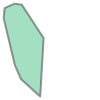

In [19]:
L_bridge = ['가창', '경대칠성', '대봉희망', '도청경대', '동신수성', '두산용두', '상동두산', '성북도청', '']

#for bridge in L_bridge :
#    url = 

df = pd.read_csv('./rawdata/final15_all.csv')
df = df[['bridge', 'osmid', 'color', 'street_count', 'lon', 'lat']]

df['lon'] = df['lon'].astype(float)
df['lat'] = df['lat'].astype(float)
    
df['geometry'] = df.apply(lambda row : Point([row['lon'], row['lat']]), axis=1)
gdf = gpd.GeoDataFrame(df[['bridge', 'osmid', 'color', 'street_count', 'geometry']], geometry='geometry', crs='epsg:4329')

poly = Polygon(Polygon(MultiPoint([[p.x, p.y] for p in gdf.geometry]).convex_hull).exterior)
    
#전체 통합
final_df = final_df.append(pd.DataFrame([name, time, poly]).T, ignore_index=True)
